In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_credits = pd.read_csv("tmdb-5000-movie-dataset\\tmdb_5000_credits.csv")
df_movies = pd.read_csv("tmdb-5000-movie-dataset\\tmdb_5000_movies.csv")

In [3]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

Using weighted average score(used by IMDb rating system):

$$ Weighted-score = (\frac{v}{v + m}) R + (\frac{m}{v + m}) C$$

- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report


In [7]:
df_credits.columns = ['id','tittle','cast','crew']
df_movies= df_movies.merge(df_credits,on='id')

In [12]:
C= df_movies['vote_average'].mean()
m= df_movies['vote_count'].quantile(0.9) #we choose an arbitrary value for m, here we choose all movies whose vote count is greater than 90 percentile of the movies

In [13]:
top_movies = df_movies.copy().loc[df_movies['vote_count'] >= m]
top_movies.shape

(481, 23)

In [17]:
def weighted_average(X, m=m, C=C):
    R = X["vote_average"]
    V = X["vote_count"]
    return (V/(V+m))*R + (m/(V+m))*C

In [18]:
top_movies["w_score"] = top_movies.apply(weighted_average,axis=1)

In [23]:
top_movies = top_movies.sort_values('w_score',ascending=False)
top_movies[['title','vote_count','vote_average','w_score']].head(12)

,title,vote_count,vote_average,w_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


In [34]:
pop_movies =  top_movies.sort_values('vote_count',ascending=False)
pop_movies[['title','w_score','vote_average','vote_count']].head(10)
pop10_movies = pop_movies[:10]

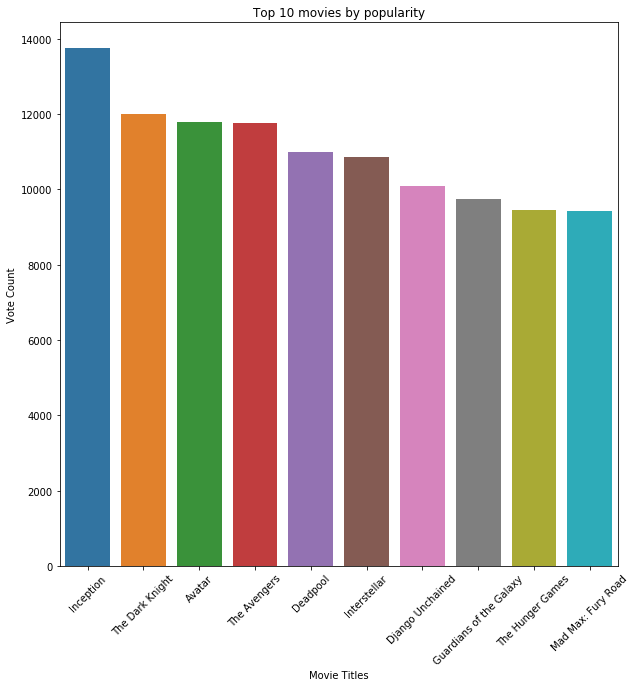

In [39]:
plt.figure(figsize= (10,10))
sns.barplot(x= pop10_movies['title'], y = pop10_movies['vote_count'])
plt.title('Top 10 movies by popularity')
plt.xticks(rotation = 45)
plt.xlabel('Movie Titles')
plt.ylabel('Vote Count')
plt.show()

This is a simple demographic filter recommendation system -- just based on the demographic information and these movies can be found on the top movies tab of many movie information 